In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

### Linear Regression
* y = c + mx

In [ ]:
'''
slope, interecept = np.polyfit(x, y, 1) #where 1 is the degree of the polynomial
#this minimises the error
'''
'''
#can find the correlation between the points as well, where negative correlation is the downward slop, and positive is 
#upward
np.corrcoef(x, y)
'''

### Autocorrelation
* Correlating a time series with itself, by shifting it by one day/unit
* Can find the autocorrelation for all shifts, and plot it vs the shifts


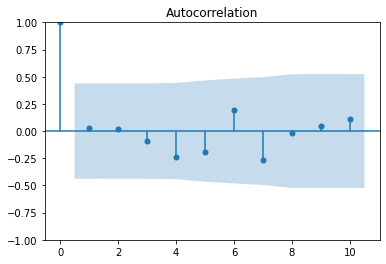

In [47]:
x = np.random.randint(low = 0, high = 200, size = 20)
sm.tsa.acf(x)

#can specifiy lags
#sm.tsa.acf(x, nlags=5)
#plot autocorrelation function
fig = tsaplots.plot_acf(x, lags=10)
plt.show()


### Lecture 2

##### Backshift
* BX_t = X_t(-1)
* For k periods, B^kX_t = X_t(-k)
* F^kX_t = X_t(+k) = B^-kX_t
* (Some authors use L instead of B for lag)
##### Differencing
* Nonstationarity can be in the mean; non constant E(X_t)
* Nonstationarity can be in the variance; non constant Var(X_t)
* Nonstationarity can be reduced to stationarity through differencing
- in most cases 2 differencing is enough, can over difference or complicate it

**dth differenced series for d >= 1 is:**
> delta^dX_t = (1-B)^d)X_t

First Difference:

> X_t - X_t(-1)

Second Difference:

> X_t + X_t(-2) - 2X_T(-1)

For seasonal ts we can use sth seasonal differencing:

> delta^sX_t = (1-B^s)X_t = X_t - X_t(-s)

sth seasonal differencing of order D for some integer D>=1 is:

> (delta^s)^DX_t = (1-B^s)^DX_t

* There is no difference if you apply seasonal first or second; but if there is strong seasonality then you apply seasonal differencing first
* Depending on ts we apply one, or the other, or both
* Use ordinary differencing first, and then test if extra round of differencing is needed



In [50]:
x_t = np.random.randint(low = 0, high = 200, size = 200)
x_t_diff = sm.tsa.statespace.tools.diff(series=x_t, k_diff=1)


#### Variance Transformation
* Lot of timeseries nonstationary around variance
* Need variance stablising transforations like Box-Cox
* **When you apply log, ACF remains same, but not when you difference**
* Other transformations used are squareroot, inverse series, inverse square root
* Cant use log and root transformations for negative time series (such as temparature)
* One solution is to add constant, shift it to mkae it positive, and apply transformations


### Time Series Decomposition
#### Basics
Time series split into three components:
* Trend (T_t): Underlying trend/manner in which the data is moving
* Seasonality (S_t): Repeated patterns visible in the data
* Noise/Irregular (I_t): Leftover residual

> Can be an **additive** or **multiplicative** model
#### Additive Model
* Increases
* X_t  = T_t + S_t + R_t
* The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series
#### Multiplicative
* Amplitude increass with increase in time period
* X_t  = T_t * S_t * R_t


In [29]:
data = pd.read_csv(r'/Users/dhruvpandit/Mirror/University/Masters/Semester 1/Time Series/airline-passengers.csv')
data=data.set_index('Month')
data = data['Passengers'].squeeze()
data

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Name: Passengers, Length: 144, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

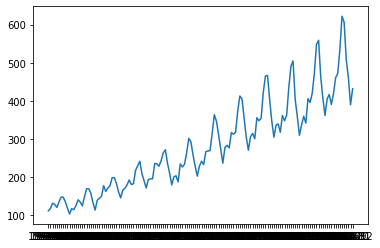

In [27]:
plt.plot(data)
plt.show

In [74]:
df_beer = pd.read_csv(r'/Users/dhruvpandit/Mirror/University/Masters/Semester 1/Econometrics/Datasets/ausbeer.csv')
df_beer.drop(columns= ['Unnamed: 0'], inplace=True, axis=1)
df_beer = df_beer.set_index('time')
df_beer = df_beer['value'].squeeze()
df_beer

time
1956.00    284
1956.25    213
1956.50    227
1956.75    308
1957.00    262
          ... 
2009.25    398
2009.50    419
2009.75    488
2010.00    414
2010.25    374
Name: value, Length: 218, dtype: int64

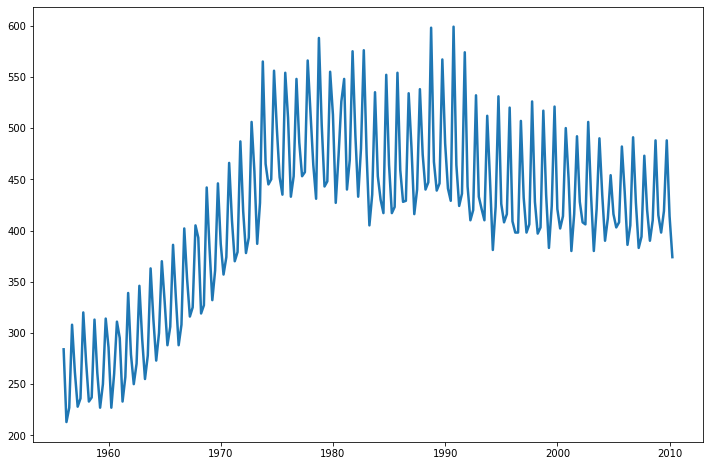

In [75]:
plt.plot(df_beer)
plt.show()

In [66]:
data_diff = sm.tsa.statespace.tools.diff(series=data, k_diff=2)

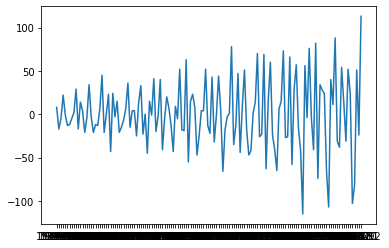

In [67]:
plt.plot(data_diff)

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [91]:
result = seasonal_decompose(data, model='multiplicative', period=20)
#define the period for the data, cant be greater than the length (obs)

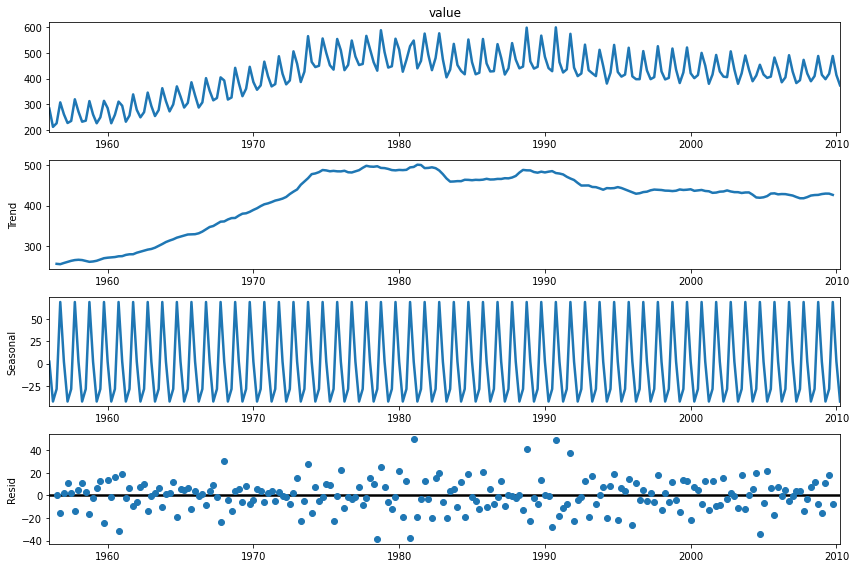

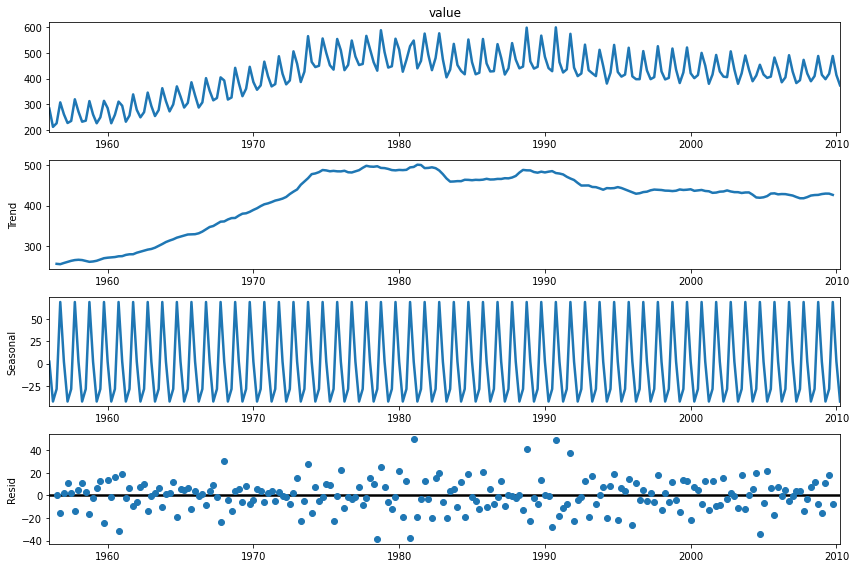

In [93]:
seasonal_decompose(df_beer, model='additive', period=4).plot()

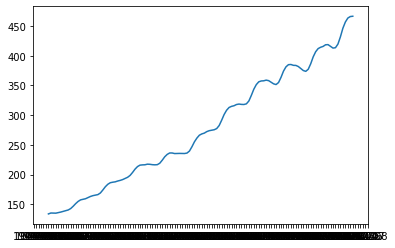

In [43]:
plt.plot(result.trend)

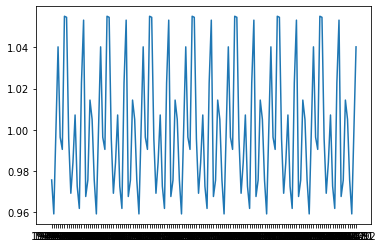

In [44]:
plt.plot(result.seasonal)

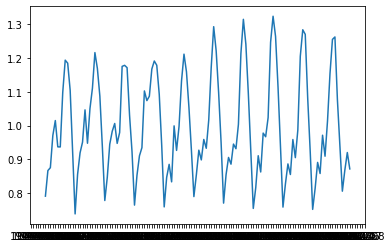

In [45]:
plt.plot(result.resid)

In [78]:
order = 2
coef = np.polyfit(np.arange(len(data.index)),
                  data.values.ravel(),
                  order) #linear regression to fit data
coef #intercept, slope

array([7.00819832e-03, 1.65501155e+00, 1.14028041e+02])

In [79]:
poly_mdl = np.poly1d(coef)
poly_mdl

poly1d([7.00819832e-03, 1.65501155e+00, 1.14028041e+02])

In [80]:
trend = pd.Series(data = poly_mdl(np.arange(len(data.index))),
                  index = data.index)
#obtaining the trendline that we have created

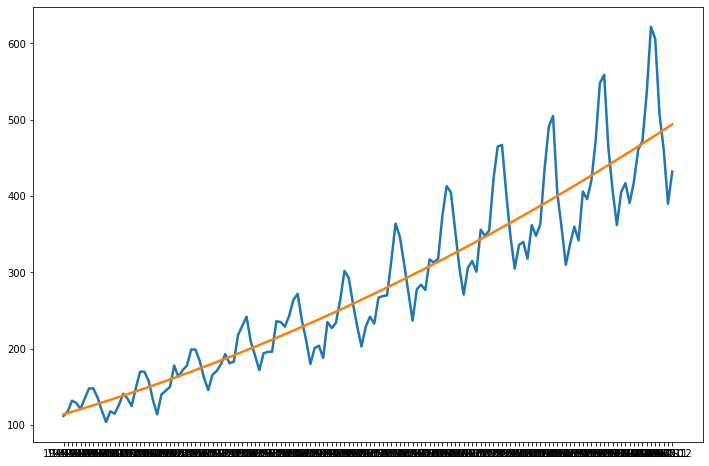

In [81]:
plt.plot(data)
plt.plot(trend)
plt.show()

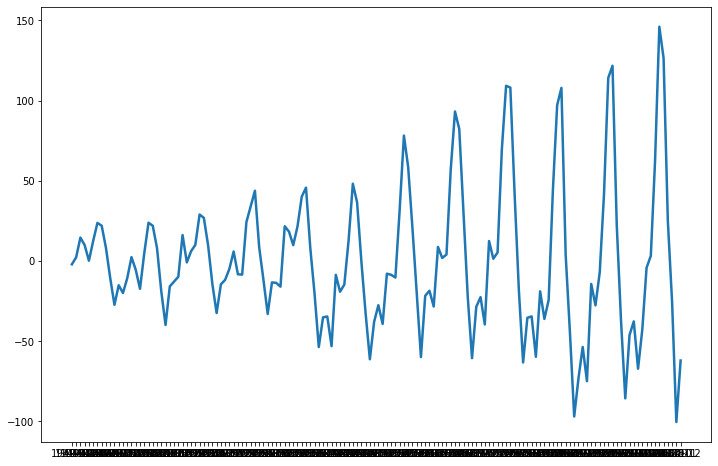

In [82]:
detrended = data.values - trend
plt.plot(detrended)